# ml_04
## k-NN 예측 영역 표시

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()

X1=iris.data[iris.target==0]     # (50,4) Setosa
X2=iris.data[iris.target==1]     # (50,4) Versicolor
X3=iris.data[iris.target==2]     # (50,4) Virginica

# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X=np.vstack([X1,X2])[:,:2]
y=np.array([0]*50+[1]*50)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
pred_y = model.predict(X)
acc=accuracy_score(y,pred_y)
print('accuracy :',acc)

accuracy : 1.0


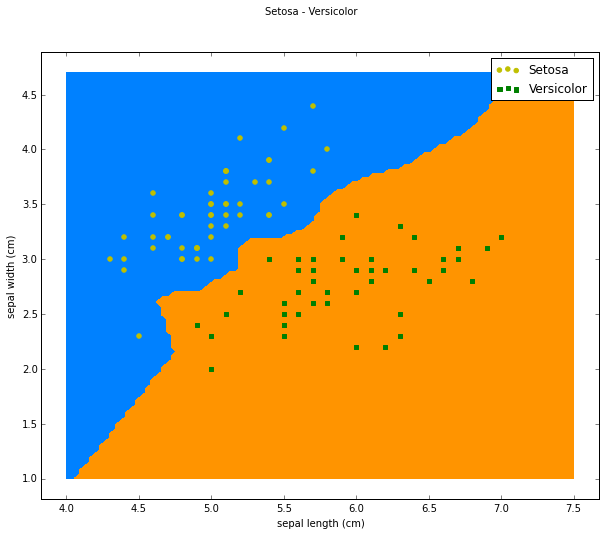

In [12]:
# plot results

xx=np.linspace(4,7.5,100)
yy=np.linspace(1,4.7,100)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:, 1]

fig=plt.figure(figsize=(10,8))
fig.suptitle('Setosa - Versicolor')

plt.contourf(data1,data2,decision_values.reshape(data1.shape),levels=[-0.5,0.5,1.5])

plt.scatter(X1[:,0],X1[:,1],marker='o',color='y',label='Setosa')
plt.scatter(X2[:,0],X2[:,1],marker='s',color='g',label='Versicolor')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()